<a href="https://colab.research.google.com/github/sspitz3/ml-practice/blob/main/homl/chapter3/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises Chapter 3

## Summary
### Binary Classification
- Performance Metrics
  - Accuracy: easy to understand but does not adjust for underlying rate
  - Precision: given the model predict the instance is in the class, what is the chance the model is correct
  - Recall: given the instance is in the class, what is the chance the model predicts it
  - F1: harmonic mean of precision and recall
  - ROC AUC: measure of how well model separates classes, given different thresholds

Example using SGDClassifier on MNIST data set. SGDClassifier by default fits a linear SVC, optimizing with stochastic gradient descent.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


# Import MNIST data set
mnist = fetch_openml('mnist_784', as_frame=False)

X, y = mnist.data, mnist.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

def transform_labels(y):
  return np.select([y == '5', y != '5'], [1,0])

model = SGDClassifier()

model.fit(X_train, transform_labels(y_train))
print("Accuracy:", accuracy_score(transform_labels(y_train), model.predict(X_train)))
print("F1:", f1_score(transform_labels(y_train), model.predict(X_train)))

Accuracy: 0.9608952380952381
F1: 0.7342394822006473


In [ ]:
# Cross Validation F1 Scores
from sklearn.model_selection import cross_val_score


model = SGDClassifier()
cross_val_score(model, X_train, transform_labels(y_train), scoring="f1")

array([0.81422925, 0.76447106, 0.73269841, 0.80020439, 0.77269957])

In [ ]:
# Try scaling the inputs first
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), SGDClassifier())
cross_val_score(model, X_train, transform_labels(y_train), scoring="f1")

array([0.82762493, 0.82450331, 0.806939  , 0.8195447 , 0.82306831])

## Multiclass Classification
If there is more than one class label, binary classifier can still be used
- One vs All: fit a binary classifier for each label, treating every other label as the negative class
- One vs One: fit a binary classifier for every combination of labels

In [ ]:
# Uses One vs Rest
model = SGDClassifier()

model.fit(X_train, y_train)

SGDClassifier()

## Question 1
Optimize MNIST classifier

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

ImportError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier()

model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

preds = model.predict(X_train)

accuracy_score(y_train, preds)

0.9807238095238096

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

param_grid = {
    'n_neighbors': [4, 5,10,15]
}

model = KNeighborsClassifier(n_jobs=10)

gs = GridSearchCV(model, param_grid=param_grid, cv=3)

gs.fit(X_train, y_train)

pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.418171,0.198450,40.107269,0.539617,4,{'n_neighbors': 4},0.967486,0.966286,0.964800,0.966190,0.001099,2
1,0.278087,0.054756,38.872113,1.768044,5,{'n_neighbors': 5},0.969257,0.967257,0.966057,0.967524,0.001320,1
2,0.235023,0.021011,38.213198,0.134915,10,{'n_neighbors': 10},0.963314,0.963029,0.961486,0.962610,0.000803,3
3,0.181756,0.013474,38.844484,0.748545,15,{'n_neighbors': 15},0.959486,0.958914,0.958800,0.959067,0.000300,4


In [ ]:
accuracy_score(gs.predict(X_test), y_test)

0.9704571428571429

## Question 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_digit(data):
  plt.imshow(data.reshape(28,28))
  plt.axis("off")

def roll_data(data, pixels, axis):
  if axis == 0:
    X_train_shifted = np.roll(X_train, 28*pixels, 1)
    X_train_shifted[:, 0:28*pixels] = 0
  else:



test = np.vectorize(roll_data, excluded=["pixels", "axis"])

X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

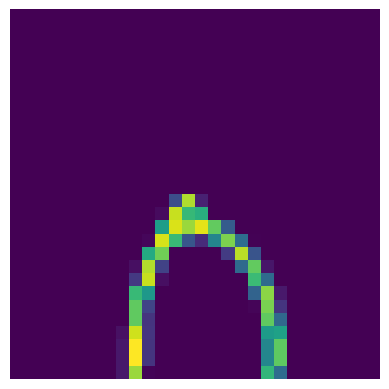

In [ ]:


X_train_shifted = np.roll(X_train, 28*10, 1)
X_train_shifted[:, 0:28*10] = 0

plot_digit(X_train_shifted[30])

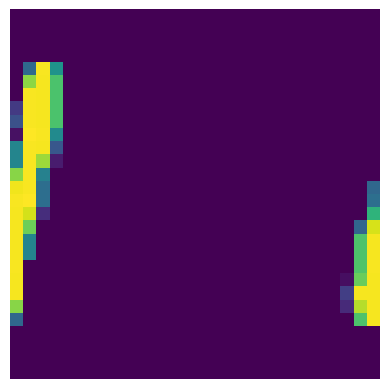

In [ ]:
np.roll(X_train.reshape(X_train.shape[0], 28, 28), 14, axis=2)[0].reshape(1, 28*28))

def shift(data, pixels, direction):
  if direction = ""
  data_shifted = np.roll(data.reshape(data.shape[0], 28*28), pixels, axis)
  if axis ==

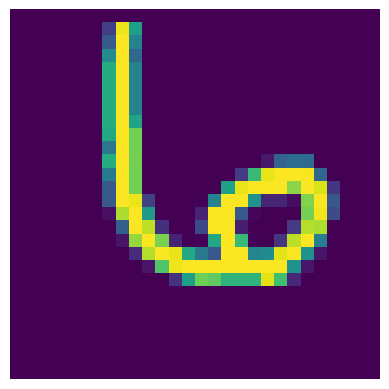

In [ ]:
plot_digit(X_train[10])

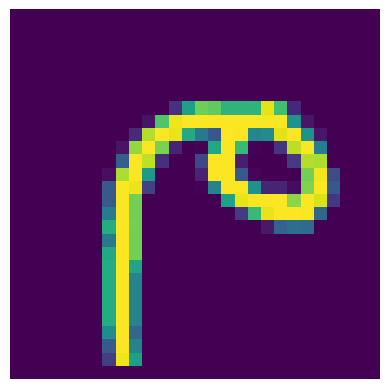

In [ ]:
plot_digit(uncube_data(np.flip(cube_data(X_train), axis=0))[10])

In [ ]:
import numpy as np

def cube_data(data):
  return np.transpose(data.reshape(data.shape[0],28,28), axes=[1,2,0])

def uncube_data(data):
  return np.transpose(data, axes=[2,0,1]).reshape(data.shape[2], 28*28)

def shift_data(data, pixels, axis):
  assert pixels > 0
  rolled_data = np.roll(data, pixels, axis)
  if axis == 0:
    rolled_data[:pixels, :, :] = 0
  else:
    rolled_data[:, :pixels, :] = 0

  return rolled_data

def shift_digits(data, pixels, axis):
  if pixels == 0:
    return data
  cubed_data = cube_data(data)
  if pixels > 0:
      shifted_data = shift_data(cubed_data, pixels, axis)
  else:
      shifted_data = np.flip(shift_data(np.flip(cubed_data, axis=axis), -pixels, axis), axis=axis)

  return uncube_data(shifted_data)


X_train_aug = np.vstack([X_train, shift_digits(X_train, 1, 0), shift_digits(X_train, -1, 0), shift_digits(X_train, 1, 1), shift_digits(X_train, -1, 1)])
y_train_aug = np.concatenate([y_train] * 5)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

param_grid = {
    'n_neighbors': [4, 5]
}

model = KNeighborsClassifier(n_jobs=10)

cross_val_score(model, X_train_aug, y_train_aug, cv=2)

## Question 3

In [ ]:
import requests
import tarfile
import pandas as pd


def load_data(url):
  r = requests.get(url)
  with open("rawdata.tgz", "wb") as f:
    f.write(r.content)
  with tarfile.open("rawdata.tgz", "r") as f:
    f.extractall("datasets")

  return pd.read_csv("datasets/titanic/train.csv")


data = load_data("https://homl.info/titanic.tgz")

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
